In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Import data
path = r'C:\\Users\\nakarton\\Downloads\\NakartonDataFiles\\09.01.24_Instacart Basket Analysis'

In [3]:
path

'C:\\\\Users\\\\nakarton\\\\Downloads\\\\NakartonDataFiles\\\\09.01.24_Instacart Basket Analysis'

In [4]:
# Import grouped df_ords_prods_merge
df_ords_prods_cust = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'full_instacart_data.pkl'))


In [5]:
df_ords_prods_cust = df_ords_prods_cust.drop(columns=['_merge', 'first_name', 'surname','median_days_since_previous_order'])
df_ords_prods_cust['order_id'] = df_ords_prods_cust['order_id'].astype('int8')
df_ords_prods_cust['user_id'] = df_ords_prods_cust['user_id'].astype('int8')
df_ords_prods_cust['order_number'] = df_ords_prods_cust['order_number'].astype('int8')
df_ords_prods_cust['orders_day_of_week'] = df_ords_prods_cust['orders_day_of_week'].astype('int8')
df_ords_prods_cust['order_hour_of_day'] = df_ords_prods_cust['order_hour_of_day'].astype('int8')
df_ords_prods_cust['days_since_previous_order'] = df_ords_prods_cust['days_since_previous_order'].astype('float32')
df_ords_prods_cust['product_id'] = df_ords_prods_cust['product_id'].astype('int32')
df_ords_prods_cust['add_to_cart_order'] = df_ords_prods_cust['add_to_cart_order'].astype('int16')
df_ords_prods_cust['reordered'] = df_ords_prods_cust['reordered'].astype('int8')
df_ords_prods_cust['aisle_id'] = df_ords_prods_cust['aisle_id'].astype('int8')
df_ords_prods_cust['department_id'] = df_ords_prods_cust['department_id'].astype('int8')
df_ords_prods_cust['prices'] = df_ords_prods_cust['prices'].astype('float32')
df_ords_prods_cust['max_order'] = df_ords_prods_cust['max_order'].astype('int8')
df_ords_prods_cust['income'] = df_ords_prods_cust['income'].astype('int8')
df_ords_prods_cust['mean_price'] = df_ords_prods_cust['mean_price'].astype('float32')


In [6]:
# Sample data
df_ords_prods_cust = df_ords_prods_cust.sample(2000000)

In [7]:
df_ords_prods_cust.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_previous_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'Busiest day',
       'Busiest days', 'Busiest_period_of_day', 'max_order', 'loyalty_flag',
       'mean_price', 'spending_flag', 'Frequency_flag', 'gender', 'state',
       'age', 'date_joined', 'no_of_dependants', 'marital_status', 'income'],
      dtype='object')

In [8]:
df_ords_prods_cust.shape

(2000000, 29)

<Axes: xlabel='orders_day_of_week'>

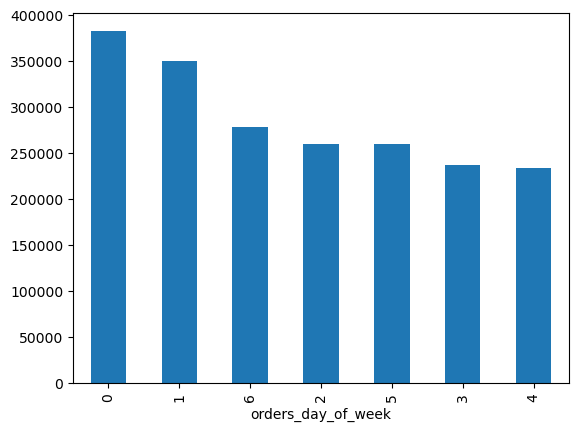

In [9]:
# Create bar chart
df_ords_prods_cust['orders_day_of_week'].value_counts().plot.bar()

<Axes: xlabel='orders_day_of_week'>

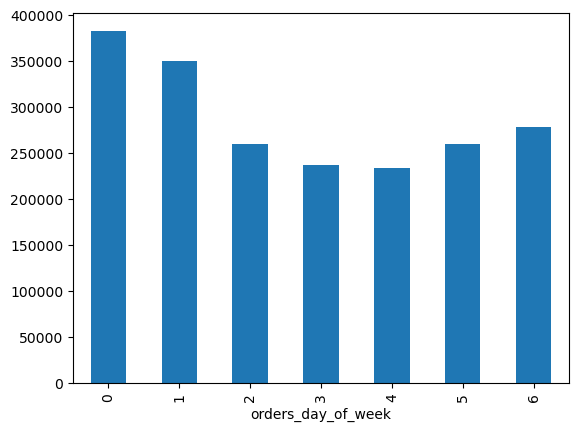

In [10]:
df_ords_prods_cust['orders_day_of_week'].value_counts().sort_index().plot.bar()

In [11]:
df_ords_prods_cust['orders_day_of_week'].value_counts()

orders_day_of_week
0    382717
1    350141
6    277650
2    259702
5    259047
3    237122
4    233621
Name: count, dtype: int64

In [12]:
df_ords_prods_cust['orders_day_of_week'].value_counts().sort_index

<bound method Series.sort_index of orders_day_of_week
0    382717
1    350141
6    277650
2    259702
5    259047
3    237122
4    233621
Name: count, dtype: int64>

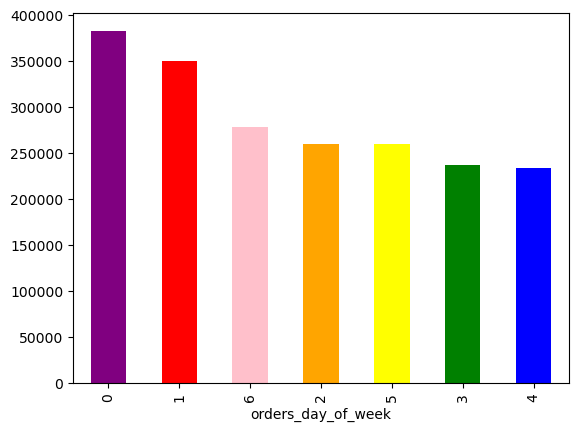

In [13]:
# Save bar chart
bar = df_ords_prods_cust['orders_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [14]:
# Export bar chart
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

<Axes: ylabel='Frequency'>

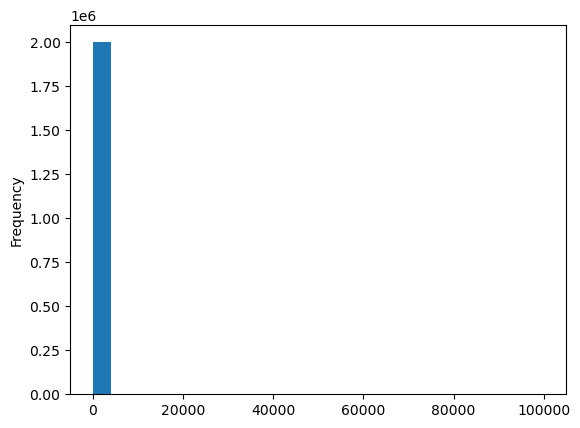

In [15]:
# Create histogram
df_ords_prods_cust['prices'].plot.hist(bins = 25)

In [16]:
# Check data consistency
df_ords_prods_cust['prices'].describe()

count    2.000000e+06
mean     1.169794e+01
std      4.549575e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [17]:
df_ords_prods_cust['prices'].median()

7.400000095367432

In [18]:
df_ords_prods_cust['prices'].mean()

11.697942

In [19]:
df_ords_prods_cust['prices'].max()

99999.0

<Axes: xlabel='prices', ylabel='prices'>

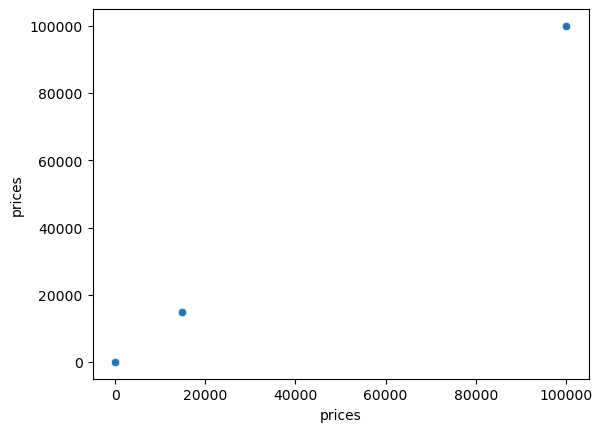

In [20]:
# Create scatterplot
sns.scatterplot(x = 'prices', y = 'prices',data = df_ords_prods_cust)

In [21]:
# Data quality check
df_ords_prods_cust.loc[df_ords_prods_cust['prices'] > 100]

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_previous_order,product_id,add_to_cart_order,reordered,product_name,...,mean_price,spending_flag,Frequency_flag,gender,state,age,date_joined,no_of_dependants,marital_status,income
26738975,-72,1,8,0,13,4.0,33664,2,1,2 % Reduced Fat Milk,...,2117.401611,High spender,Frequent customer,Male,New Mexico,57,7/29/2017,1,married,-126
29092445,-128,-128,3,3,17,30.0,21553,9,0,Lowfat 2% Milkfat Cottage Cheese,...,337.686676,High spender,Non-frequent customer,Male,Maryland,30,8/10/2019,3,married,-26
27321213,109,19,7,2,19,19.0,21553,6,0,Lowfat 2% Milkfat Cottage Cheese,...,111.132874,High spender,Regular customer,Male,Hawaii,35,11/26/2018,1,married,-63
29608028,79,57,12,0,15,7.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,...,535.255066,High spender,Frequent customer,Male,New York,26,2/13/2018,2,married,100
29861787,63,-18,4,5,19,11.0,21553,15,0,Lowfat 2% Milkfat Cottage Cheese,...,240.715622,High spender,Regular customer,Male,Arizona,34,7/11/2017,0,single,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10857900,34,-99,8,4,11,8.0,21553,4,1,Lowfat 2% Milkfat Cottage Cheese,...,449.730133,High spender,Frequent customer,Female,Massachusetts,64,4/12/2017,1,married,-49
239957,-37,126,5,3,17,15.0,21553,2,0,Lowfat 2% Milkfat Cottage Cheese,...,72.671860,High spender,Regular customer,Female,Minnesota,24,10/11/2018,1,married,-116
29856647,25,82,12,0,19,3.0,33664,8,1,2 % Reduced Fat Milk,...,4174.447754,High spender,Frequent customer,Female,West Virginia,28,7/27/2019,0,single,125
27335068,-64,-3,22,1,15,8.0,21553,8,1,Lowfat 2% Milkfat Cottage Cheese,...,145.076859,High spender,Regular customer,Male,Alabama,30,5/9/2017,0,single,17


In [22]:
# Replace outlier with NaN
df_ords_prods_cust.loc[df_ords_prods_cust['prices'] >100, 'prices'] = np.nan

In [23]:
df_ords_prods_cust['prices'].max()

25.0

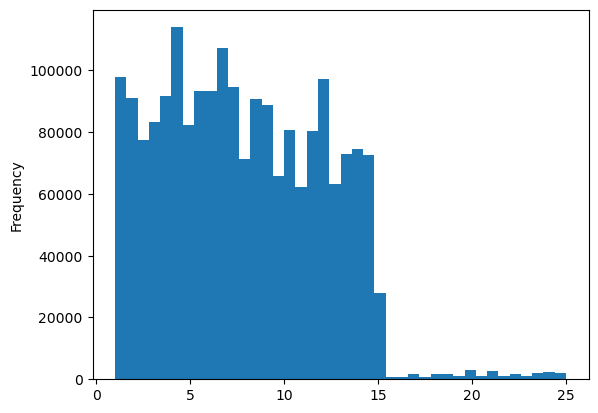

In [24]:
# histogram chart
hist = df_ords_prods_cust['prices'].plot.hist(bins = 40)

In [25]:
# Export histogram chart
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_orders_dow.png'))

In [26]:
# Create line chart
df = df_ords_prods_cust[:2000000]

In [27]:
dev = np.random.rand(len(df_ords_prods_cust)) <= 0.7

In [28]:
dev

array([False,  True,  True, ...,  True,  True,  True])

In [29]:
# Create randon floating numbers between 0 and 1
np.random.rand(10)

array([0.87987943, 0.49260139, 0.9996546 , 0.54111669, 0.07039534,
       0.09732067, 0.78349685, 0.37315729, 0.82833793, 0.32587935])

In [30]:
# Store 70% of the sample in the dataframe big
big = df_ords_prods_cust[dev]

In [31]:
# Store 30% of the sample in the dataframe small
small = df_ords_prods_cust[~dev]

In [32]:
# Data check with len
len(df_ords_prods_cust)

2000000

In [33]:
len(big) + len(small)

2000000

In [34]:
# Create df_2 column
df_2 = small[['orders_day_of_week','prices']]

C:\Users\nakarton\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nakarton\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


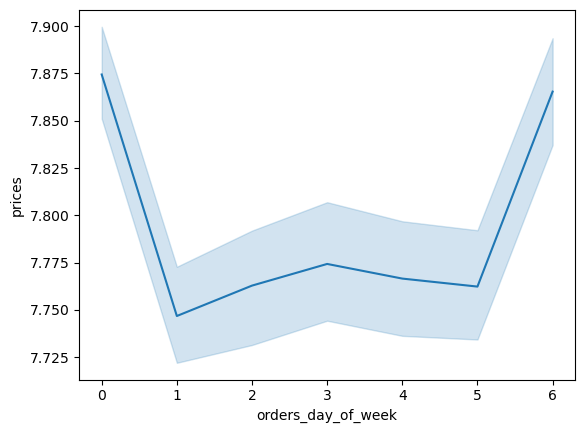

In [35]:
# Create line chart
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

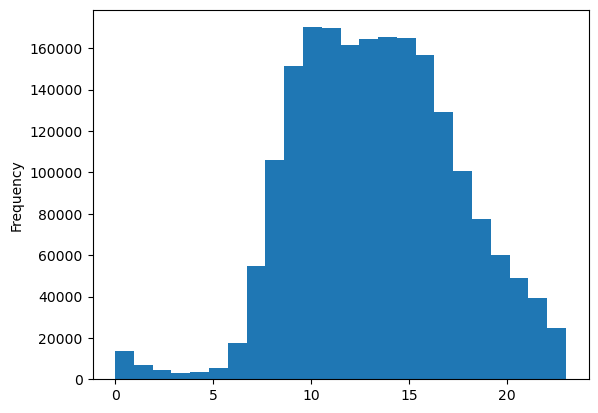

In [36]:
# Create histogram for order_hour_of_day
hist_order_hour = df_ords_prods_cust['order_hour_of_day'].plot.hist(bins = 24)

In [ ]:
# I created a histogram with 24 bins with each hour of the day having its own bin. The histogram represents the frequency of orders for each hour of the day.

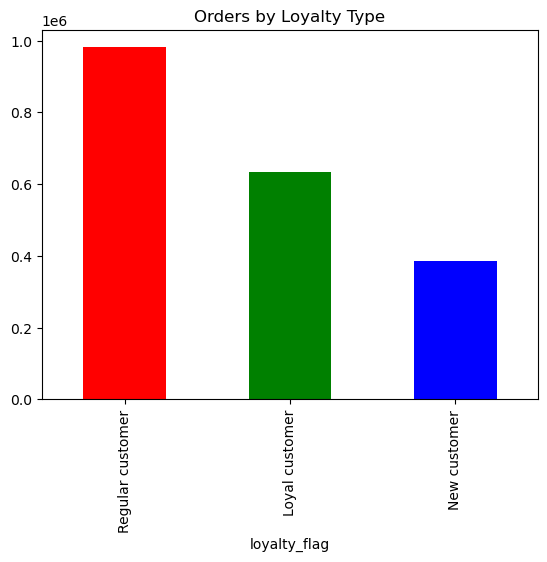

In [37]:
# Create bar chart from loyalty_flag
bar_loyalty = df_ords_prods_cust['loyalty_flag'].value_counts().plot.bar(color =['red', 'green', 'blue'], title='Orders by Loyalty Type')

In [41]:
# Create subset for dependants
small_age_dependants = small[['age','no_of_dependants']]

C:\Users\nakarton\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nakarton\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


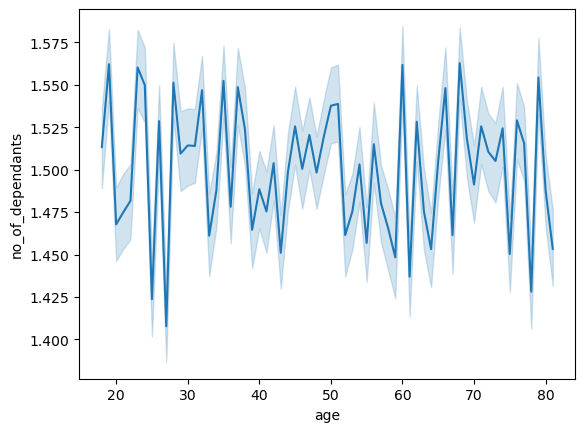

In [42]:
# Create line chart for dependants
line_age_dependants = sns.lineplot(data = small_age_dependants, x = 'age',y = 'no_of_dependants')

In [ ]:
# The line chart shows that a random distribution of number of dependants based on age. In other words, age of a person doesn't seem to predict the number of dependants that person has in any meaningful way.

In [43]:
# Find max age
small_age_dependants['age'].max()

81

In [44]:
# Find min age
small_age_dependants['age'].min()

18

In [45]:
# Create subset for age & income
small_age_income = small[['age','income']]

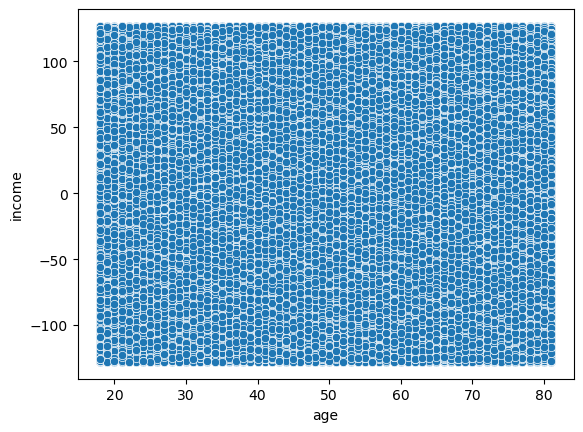

In [46]:
# Create scatterplot for age & income
plot_age_income = sns.scatterplot(x = 'age', y = 'income',data = small_age_income)

In [ ]:
# The scatterplot shows that income is scattered across age groups. This chart might make the analysis difficult.

In [47]:
# Check max income by age
small_age_income.groupby('age').agg({'income': ['max']}).head(40)

,income
,max
age,
18,127
19,127
20,127
21,127
22,127
23,127
24,127
25,127


In [48]:
# Export histogram
hist_order_hour.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'histogram_order_hour_4.9_task.png'))

In [49]:
# Export bar chart
bar_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_4.9_task.png'))

In [51]:
# Export age dependants line chart
line_age_dependants.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_dependants_4.9_task.png'))

In [52]:
# Export scatterplot
plot_age_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'plot_age_income_4.9_task.png'))